In [199]:
from collections import Counter
import nltk
import pandas as pd
import re as regex
import numpy as np
from nltk.corpus import stopwords
import string
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import string

In [200]:
farmers= pd.read_csv('founding_farmers_reviews.csv')

In [201]:
farmers.columns=["Reviewer", "Reviewer_location", "Review_date","Stars", "Comments"]

In [202]:
farmers.head()

,Reviewer,Reviewer_location,Review_date,Stars,Comments
0,Angelica T.,"San Jose, CA",5/14/18,4,Can get crowded during rush meal hours + weeke...
1,Ashton C.,"Atlanta, GA",5/14/18,5,This place is sooooooooooooooo GOOD! Found the...
2,Ashley C.,"Chicago, IL",5/14/18,5,WOW! This place is nothing short of A-M-A-Z-I-...
3,Christine L.,"Charlotte, NC",5/14/18,5,So I found this place as I was researching a t...
4,Dia H.,"Stanley, NC",5/10/18,4,"A supposed renowned eating destination, and wh..."


In [203]:
farmers.shape

(10702, 5)

In [204]:
farmers.dtypes

Reviewer             object
Reviewer_location    object
Review_date          object
Stars                 int64
Comments             object
dtype: object

In [205]:
farmers.describe()

,Stars
count,10702.000000
mean,3.982994
std,1.103168
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [206]:
farmers['Stars'].describe()

count    10702.000000
mean         3.982994
std          1.103168
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Stars, dtype: float64

In [125]:
farmers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 5 columns):
Reviewer             10702 non-null object
Reviewer_location    10700 non-null object
Review_date          10702 non-null object
Stars                10702 non-null int64
Comments             10702 non-null object
dtypes: int64(1), object(4)
memory usage: 418.1+ KB


In [126]:
farmers['Stars'].value_counts()

5    4350
4    3487
3    1603
2     857
1     405
Name: Stars, dtype: int64

In [127]:
farmers['Comments'][0]

'Can get crowded during rush meal hours + weekend brunch hours so reserve if you can! I came in on a Monday around 11:00 so I was able to be seated within 10-15 minutes.Had heard a lot about this place so I was really excited to try it. Decided to go with a crab Benedict and an Earl Grey to get my brunching started.First thing that caught my eye was the dark coffee rim stain on my cup :(. I\'m not a germaphobe but it detracted from the otherwise cute decor. Food wise-The crab cake was delicious, and most certainly had more crab than stuffing. I was just a little disappointed in the side, I guess I was expecting that it\'d be a side of roasted tomatoes, and not just 2 thin sandwich slices."White" Earl Grey was also just a really watered down version of Earl Grey, but the pot cost 4.24, bring the total up to 21+ tip for brunch (!)Overall, while I think the layout of the place is fun, and there are plenty of cocktail selections for everyone to choose from, I wouldn\'t be all too excited t

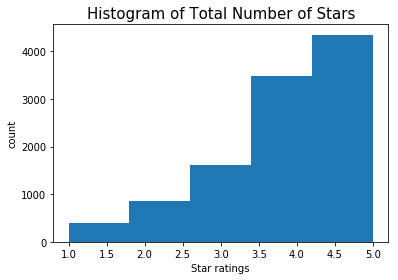

In [128]:
import matplotlib.pyplot as plt

hist = plt.hist(farmers['Stars'], bins = 5)
xlabel = plt.xlabel('Star ratings')
ylabel = plt.ylabel('count')
title = plt.title('Histogram of Total Number of Stars', fontsize = 15)

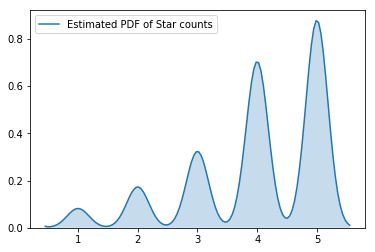

In [130]:
import seaborn as sns
sns.kdeplot(farmers['Stars'], shade=True, label='Estimated PDF of Star counts')

In [131]:
farmers['Comments length'] = farmers['Comments'].apply(len)
farmers.head()

,Reviewer,Reviewer_location,Review_date,Stars,Comments,Comments length
0,Angelica T.,"San Jose, CA",5/14/18,4,Can get crowded during rush meal hours + weeke...,1090
1,Ashton C.,"Atlanta, GA",5/14/18,5,This place is sooooooooooooooo GOOD! Found the...,749
2,Ashley C.,"Chicago, IL",5/14/18,5,WOW! This place is nothing short of A-M-A-Z-I-...,620
3,Christine L.,"Charlotte, NC",5/14/18,5,So I found this place as I was researching a t...,879
4,Dia H.,"Stanley, NC",5/10/18,4,"A supposed renowned eating destination, and wh...",1462


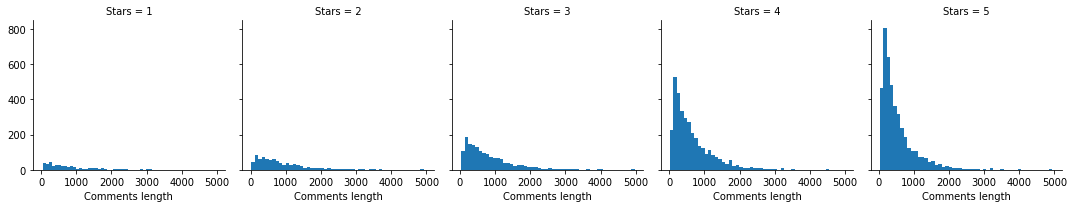

In [141]:
comments = sns.FacetGrid(data=farmers, col='Stars')
grid=comments.map(plt.hist, 'Comments length', bins=50)

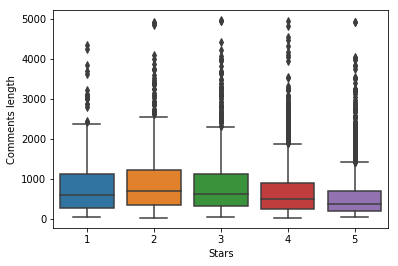

In [178]:
boxplot = sns.boxplot(x='Stars',y='Comments length', data=farmers)

In [145]:
farmers.corr()

,Stars,Comments length
Stars,1.000000,-0.192286
Comments length,-0.192286,1.000000


In [148]:
farmers_class = farmers[(farmers['Stars']== 1)| (farmers['Stars']== 5)]

farmers_class.shape

(4755, 6)

In [154]:
X = farmers_class['Comments']
Y = farmers_class['Stars']

In [159]:
X[1]

"This place is sooooooooooooooo GOOD! Found them on Yelp. I was attracted to the reviews. This is my first time coming across a restaurant with this many great reviews. My expectations were beyond high and when I got here they still managed to impress me. I tried the following:Strawberry waffle (FLAME)Grits (Yummy I added sugar to mine)Thick cut Pepper Bacon (LIFFFFFFFFE! You have not lived until you've tried!!!)Scrambled Eggs (Perfect)Highlights*****************************************************-Gourmet Breakfast-Great Ambience-Diverse FRIENDLY Staff \xa0-Won't put you in a good comma-Perfect LocationNegative*****************************************************-The wait but I guarantee it is worth it!Highly recommend this spot for brunch!!!"

In [162]:
import textblob
from textblob import TextBlob

In [163]:
review = TextBlob(X[1])

In [165]:
review.noun_phrases

WordList(['good', 'found', 'yelp', 'great reviews', 'strawberry', 'flame', 'grits', 'yummy', 'thick', 'pepper bacon', 'liffffffffe', 'scrambled eggs', 'perfect', 'highlights*****************************************************-gourmet breakfast-great ambience-diverse friendly staff', "-wo n't", 'good comma-perfect', 'locationnegative*****************************************************-the', 'highly'])

In [166]:
review.sentiment

Sentiment(polarity=0.5357421875, subjectivity=0.4904166666666667)

In [ ]:
print(string.punctuation)

In [ ]:
import string
def comment_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    clean = [x for x in text if x not in string.punctuation]
    clean = ''.join(clean)
    
    return [word for word in clean.split() if word.lower() not in stopwords.words('english')]